<a href="https://colab.research.google.com/github/parsafrz76/Classification-of-dental-caries/blob/main/ALABAMA_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
data=pd.read_csv('/content/gdrive/MyDrive/ALABAMA/data.csv',on_bad_lines='skip')

In [ ]:
##

In [ ]:
import pandas as pd



for i in range(data.shape[0]):##The 'for' loop iterates through the rows of the DataFrame.

    l = data.loc[i]["path"].split(",")#It splits the "path" values by a comma and processes each part, removing certain characters.

    f = ""
    for j in l:
        j = j.strip()
        if j[0] != "[":
            f = f + j[:-1] + " "
    data.at[i, "path"] = f[:-1]  # Update the DataFrame with the modified 'path' value


In [ ]:
data

,Unnamed: 0,path,impressions,cost,sales
0,0,Phone Phone Phone Phone Phone Phone Phone Phon...,90,0.26882,NaN
1,1,PC PC PC PC PC PC PC PC PC PC PC PC PC PC Phon...,180,0.47130,NaN
2,2,Phone PC PC Phone PC PC PC PC PC PC PC PC PC P...,36,0.10622,NaN
3,3,PC PC Phone PC Phone PC PC PC PC PC PC PC PC P...,60,0.14821,NaN
4,4,PC Phone Phone Phone PC PC PC PC PC Phone Phon...,36,0.10069,NaN
...,...,...,...,...,...
20485,20485,Phone PC PC PC Phone Phone Phone Phone Phone P...,51,0.14903,NaN
20486,20486,PC PC PC Phone PC PC PC PC PC Phone PC PC PC P...,45,0.14649,NaN
20487,20487,PC PC PC PC PC PC PC PC PC PC PC PC PC PC Phon...,46,0.15191,NaN
20488,20488,Phone Phone Phone Phone PC PC PC PC Phone Phon...,30,0.06427,NaN


In [ ]:
data=data.dropna() #Missing values are dropped here
data= data.drop(columns=['Unnamed: 0']) #this column is just not important.


In [ ]:
data['cost']=data['cost'].multiply(10) #for better scaling, it multiplied by 10

In [ ]:
ROAS=data.sales/data.cost #ROA is calculated according to the formula.
data['ROAS']=ROAS
data

,path,impressions,cost,sales,ROAS
22,PC PC Phone Phone Phone Phone Phone Phone Phon...,384,11.2180,10.26,0.914602
29,Phone Phone Phone Phone Phone Phone Phone Phon...,180,5.5064,42.40,7.700131
52,Phone Phone Phone Phone Phone Phone Phone Phon...,378,11.7496,70.28,5.981480
66,Phone Phone Phone Phone Phone Phone Phone Phon...,360,10.8703,78.71,7.240831
70,Phone Phone Phone Phone Phone Phone Phone Phon...,5544,145.0251,259.35,1.788311
...,...,...,...,...,...
20433,Phone Phone Phone Phone Phone Phone Phone Phon...,51246,1420.5175,2044.84,1.439504
20454,Phone Phone Phone Phone Phone Phone Phone Phon...,475,16.5165,11.64,0.704750
20456,Phone PC PC PC PC Phone Phone Phone Phone Phon...,588,16.5842,84.36,5.086769
20459,PC PC PC PC Phone Phone Phone Phone Phone Phon...,1068,28.4601,13.27,0.466267


<ipython-input-9-6dabf48db315>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)


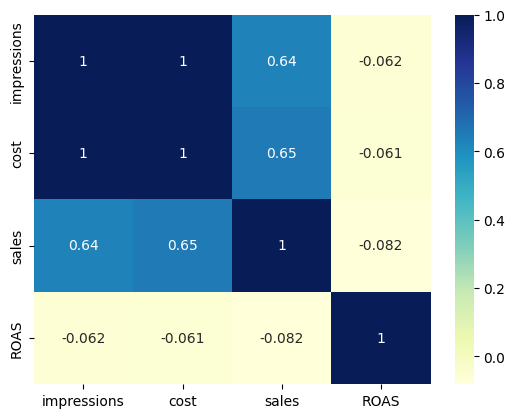

In [ ]:
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True) #heatmaps for correlation is drawn by this function


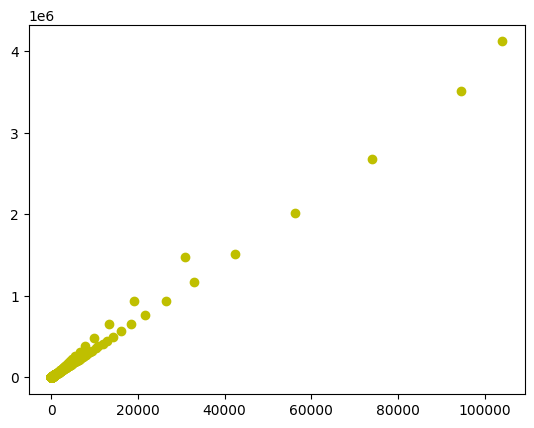

In [ ]:
plt.scatter(x='cost',y='impressions',c='y',data=data) #scateet plot of cost and impression. It is linear.


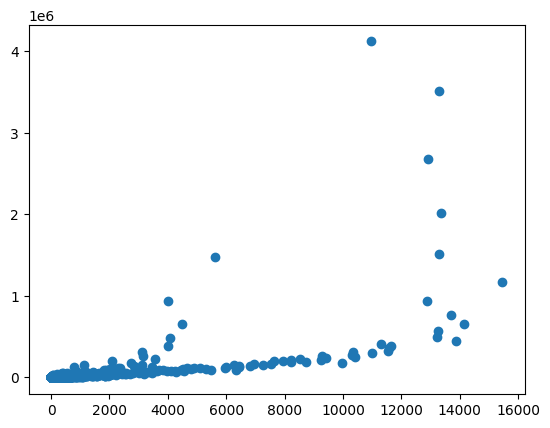

In [ ]:
plt.scatter(x='sales',y='impressions',data=data) #scatter plot of sales and impressions


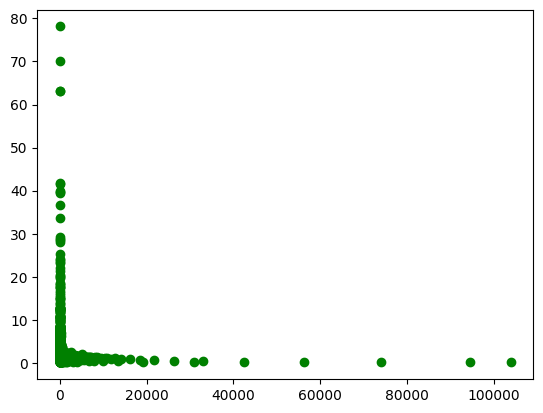

In [ ]:
plt.scatter(x='cost',y='ROAS',c='g',data=data) #scatterplot of cost and ROAS


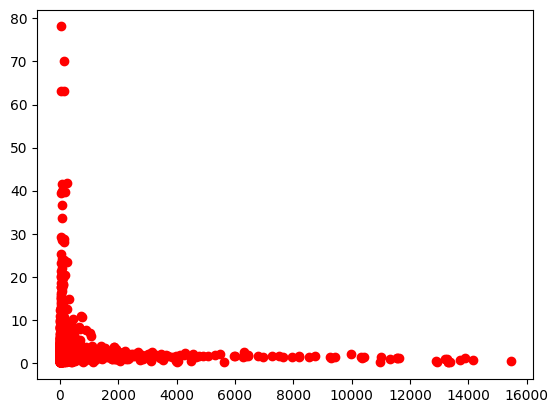

In [ ]:
plt.scatter(x='sales',y='ROAS',c='r',data=data) #scatterplot of sales and ROAS


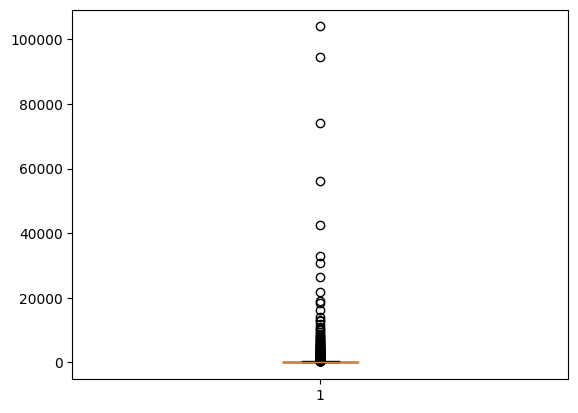

<Figure size 1000x1000 with 0 Axes>

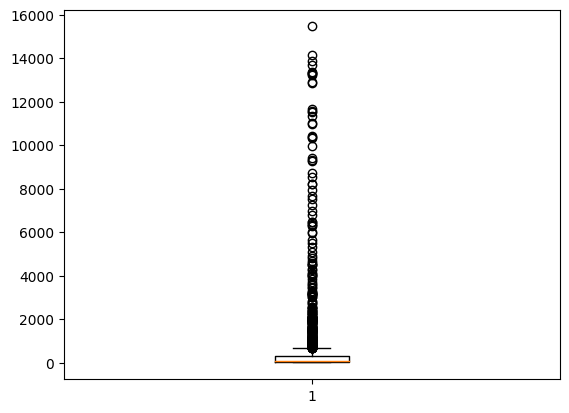

<Figure size 1000x1000 with 0 Axes>

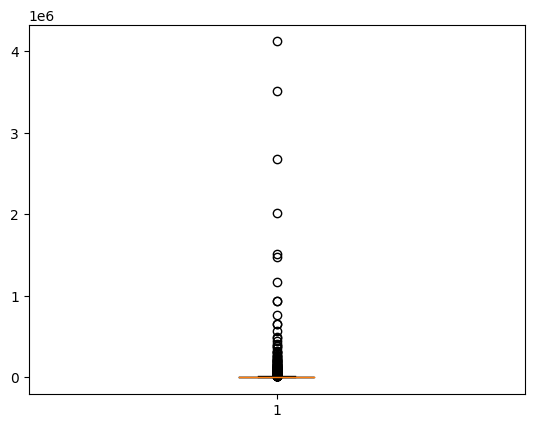

<Figure size 1000x1000 with 0 Axes>

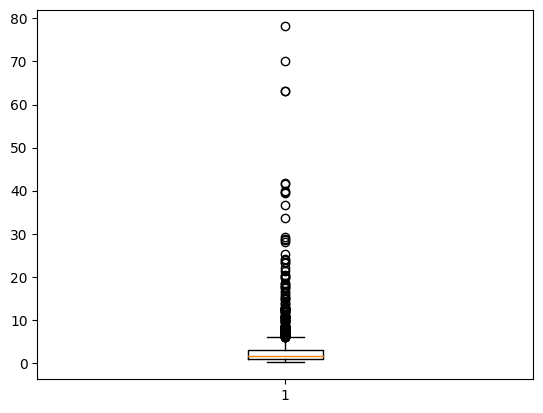

<Figure size 1000x1000 with 0 Axes>

In [ ]:
plt.boxplot(data.cost)
fig = plt.figure(figsize =(10,10))
plt.show()
plt.boxplot(data.sales)
fig = plt.figure(figsize =(10,10))
plt.show()
plt.boxplot(data.impressions)
fig = plt.figure(figsize =(10,10))
plt.show()
plt.boxplot(data.ROAS)
fig = plt.figure(figsize =(10,10))
plt.show()
#boxplot are not depicted in the report. There is no significant information. There are some outlier in all variables.

In [ ]:
def describe_new(data):
    data1 = data.describe()
    data1.loc["range"] = data1.loc['max'] - data1.loc['min'] #Decsribe does not provide the range. We calculated the range by defining new function.
    return data1

print (describe_new(data))

        impressions           cost         sales         ROAS
count  1.452000e+03    1452.000000   1452.000000  1452.000000
mean   2.927579e+04     768.936401    620.288953     2.983201
std    1.891426e+05    4981.323461   1816.852333     5.511928
min    2.200000e+01       0.667300      3.120000     0.105468
25%    5.400000e+02      15.285675     27.050000     0.848850
50%    1.886000e+03      50.681400     72.470000     1.555654
75%    8.020500e+03     197.654375    288.560000     2.897655
max    4.116002e+06  103961.476200  15452.900000    78.120785
range  4.115980e+06  103960.808900  15449.780000    78.015317


In [ ]:
data1 = data.copy()
data1.loc[data1['ROAS'] < 2, 'label'] = 0
data1.loc[data1['ROAS'] >= 2, 'label'] = 1
# we defined labels for ROAs

In [ ]:
counts = data1['label'].value_counts()
counts
#To some extent it is imbalanced.

0.0    905
1.0    547
Name: label, dtype: int64

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#for working with sequences, we need to encode them and make tokens.

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data1["path"]) #fits the tokenizer on the text data in the "path" column of the DataFrame data1. This step builds the vocabulary based on the text in that column.

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(data["path"]) #converts the text in the "path" column of the DataFrame data into sequences of integers. This replaces each word in the text with its corresponding index in the vocabulary created by the tokenizer.
max_sequence_length = 300  # Adjust as needed
sequences = pad_sequences(sequences, maxlen=max_sequence_length) #pads the sequences to a fixed length of max_sequence_length using pad_sequences. This ensures that all sequences are of the same length, which is often necessary for feeding the data into neural networks
vocab_size = len(tokenizer.word_index) + 1#calculate the vocabulary size, which is one more than the length of the tokenizer's word index. This is useful for defining the input dimension of an embedding layer in a neural network.


In [ ]:
X=data1.drop(columns=['label']) #defining X and y for training
y=data1['label']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sequences,y, test_size=0.3, random_state=42) #30% splitted for testing and 70% for training.


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming 'X_train' contains  sequences (list of lists)
# Ensure 'X_train' is a list of lists with integer-encoded sequences

# Pad sequences to the same length (max_sequence_length)
X_train_padded = pad_sequences(X_train, maxlen=max_sequence_length, padding='post', truncating='post')

# Now, 'X_train_padded' should have a shape of (num_samples, max_sequence_length)


**Machine learning** **methods**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

**Logistic regression**

In [ ]:
param_grid = {
    'C': [0.0001,0.001, 0.01, 0.1, 1,10],  # Regularization strength
    'penalty': ['l1', 'l2']          # Regularization penalty (L1 or L2)
}


In [ ]:
logistic_reg = LogisticRegression(solver='liblinear')
grid_search = GridSearchCV(estimator=logistic_reg, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 0.001, 'penalty': 'l2'}


In [ ]:
best_logistic_reg = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'], solver='liblinear')
best_logistic_reg.fit(X_train, y_train)
y_pred = best_logistic_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with Best Parameters: {accuracy:.2f}')

report = classification_report(y_test, y_pred)
print(report)


Accuracy with Best Parameters: 0.61
              precision    recall  f1-score   support

         0.0       0.62      0.94      0.74       264
         1.0       0.51      0.10      0.17       172

    accuracy                           0.61       436
   macro avg       0.57      0.52      0.46       436
weighted avg       0.58      0.61      0.52       436



**KNN**

In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7],      # Number of neighbors
    'metric': ['euclidean', 'manhattan', 'chebyshev']  # Distance metric
}

In [ ]:
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [3, 5, 7]},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 7}


In [ ]:
best_knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], metric=best_params['metric'])
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with Best Parameters: {accuracy:.2f}')

report = classification_report(y_test, y_pred)
print(report)


Accuracy with Best Parameters: 0.63
              precision    recall  f1-score   support

         0.0       0.65      0.83      0.73       264
         1.0       0.56      0.32      0.41       172

    accuracy                           0.63       436
   macro avg       0.60      0.58      0.57       436
weighted avg       0.61      0.63      0.60       436



**SVM**

In [ ]:
param_grid = {
    'C': [0.1, 1, 5,10,20],               # Regularization parameter
    'kernel': ['linear', 'rbf'],     # Kernel type
    'gamma': ['scale', 'auto', 0.1]  # Kernel coefficient (only for 'rbf' kernel)
}


In [ ]:
svm = SVC()
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 5, 10, 20],
                         'gamma': ['scale', 'auto', 0.1],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 20, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
best_svm = SVC(C=best_params['C'], kernel=best_params['kernel'], gamma=best_params['gamma'])
best_svm.fit(X_train, y_train)
y_pred = best_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with Best Parameters: {accuracy:.2f}')

report = classification_report(y_test, y_pred)
print(report)

Accuracy with Best Parameters: 0.63
              precision    recall  f1-score   support

         0.0       0.69      0.71      0.70       264
         1.0       0.53      0.51      0.52       172

    accuracy                           0.63       436
   macro avg       0.61      0.61      0.61       436
weighted avg       0.63      0.63      0.63       436



**Deep learning models**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN
from tensorflow import keras


In [ ]:
model1 = Sequential()
model1.add(Embedding(input_dim=vocab_size, output_dim=32, input_length=max_sequence_length))
model1.add(keras.layers.SimpleRNN(32, return_sequences=True))
model1.add(keras.layers.SimpleRNN(32, return_sequences=True))  # Adding a deep RNN layer
model1.add(keras.layers.SimpleRNN(32))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 32)           128       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 300, 32)           2080      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 300, 32)           2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6401 (25.00 KB)
Trainable params: 6401 (25.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
save1=model1.save('/content/gdrive/MyDrive/ALABAMA')

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
# Define the ModelCheckpoint callback to save the best weights
checkpoint = ModelCheckpoint('best_model_weights.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
num_epochs = 20


In [ ]:
history=model1.fit(X_train_padded, y_train, epochs=num_epochs, batch_size=2 ,validation_data=(X_test, y_test), callbacks=[checkpoint])

Epoch 1/20
508/508 [==============================] - ETA: 0s - loss: 0.6861 - accuracy: 0.5807
Epoch 1: val_accuracy improved from -inf to 0.60550, saving model to best_model_weights.h5
508/508 [==============================] - 112s 213ms/step - loss: 0.6861 - accuracy: 0.5807 - val_loss: 0.6689 - val_accuracy: 0.6055
Epoch 2/20
  1/508 [..............................] - ETA: 1:18 - loss: 0.7391 - accuracy: 0.5000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


508/508 [==============================] - ETA: 0s - loss: 0.6656 - accuracy: 0.6211
Epoch 2: val_accuracy improved from 0.60550 to 0.61468, saving model to best_model_weights.h5
508/508 [==============================] - 110s 218ms/step - loss: 0.6656 - accuracy: 0.6211 - val_loss: 0.6686 - val_accuracy: 0.6147
Epoch 3/20
508/508 [==============================] - ETA: 0s - loss: 0.6530 - accuracy: 0.6250
Epoch 3: val_accuracy improved from 0.61468 to 0.63073, saving model to best_model_weights.h5
508/508 [==============================] - 107s 210ms/step - loss: 0.6530 - accuracy: 0.6250 - val_loss: 0.6569 - val_accuracy: 0.6307
Epoch 4/20
508/508 [==============================] - ETA: 0s - loss: 0.6649 - accuracy: 0.6024
Epoch 4: val_accuracy improved from 0.63073 to 0.63303, saving model to best_model_weights.h5
508/508 [==============================] - 108s 212ms/step - loss: 0.6649 - accuracy: 0.6024 - val_loss: 0.6508 - val_accuracy: 0.6330
Epoch 5/20
508/508 [================

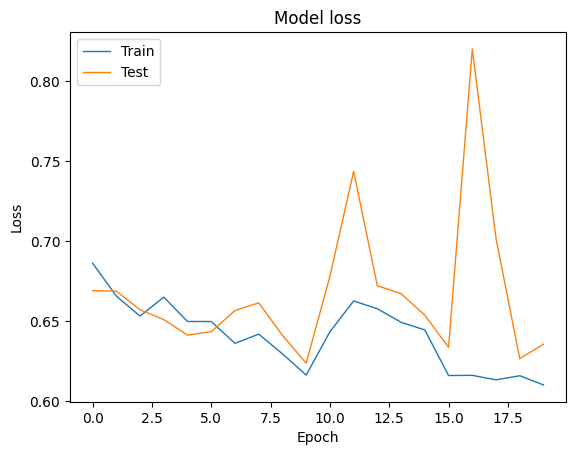

In [ ]:
plt.plot(history.history['loss'], linewidth=1, label='Train')
plt.plot(history.history['val_loss'], linewidth=1, label='Test')
plt.legend(loc='upper left')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

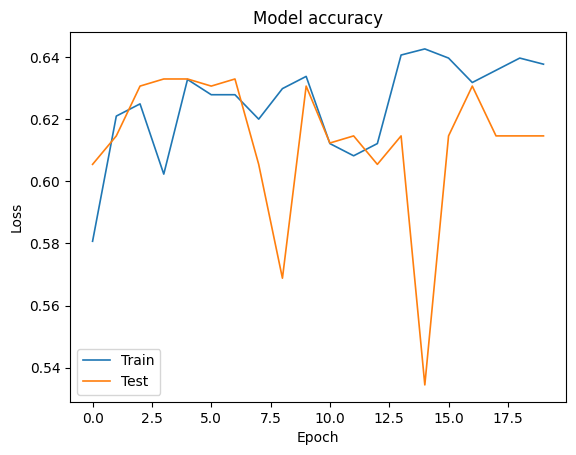

In [ ]:
plt.plot(history.history['accuracy'], linewidth=1.2, label='Train')
plt.plot(history.history['val_accuracy'], linewidth=1.2, label='Test')
plt.legend(loc='lower left')
plt.title('Model accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()